In [1]:
pip install torch transformers seaborn matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 62.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 57.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 59.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [6]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import AutoModel, AutoTokenizer

# Load ClinicalBERT model & tokenizer
model_name = "emilyalsentzer/Bio_ClinicalBERT"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name, output_attentions=True)

# Function to process text and extract attention scores
def get_attention(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True)


    with torch.no_grad():
        outputs = model(**inputs)

    # Extract attention from the last layer & first attention head
    attentions = outputs.attentions[-1]
    attention_scores = attentions[0, 0].detach().cpu().numpy()
    tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])

    return tokens, attention_scores

# To visualize the attention heatmap
def plot_attention(tokens, attention_scores, title="Attention Heatmap"):
    plt.figure(figsize=(16, 12))
    sns.heatmap(attention_scores, xticklabels=tokens, yticklabels=tokens, cmap="viridis", annot=True, annot_kws={"size": 12})

    plt.title(title, fontsize=18)
    plt.xlabel("Tokens", fontsize=14)
    plt.ylabel("Tokens", fontsize=14)
    plt.xticks(rotation=90, fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


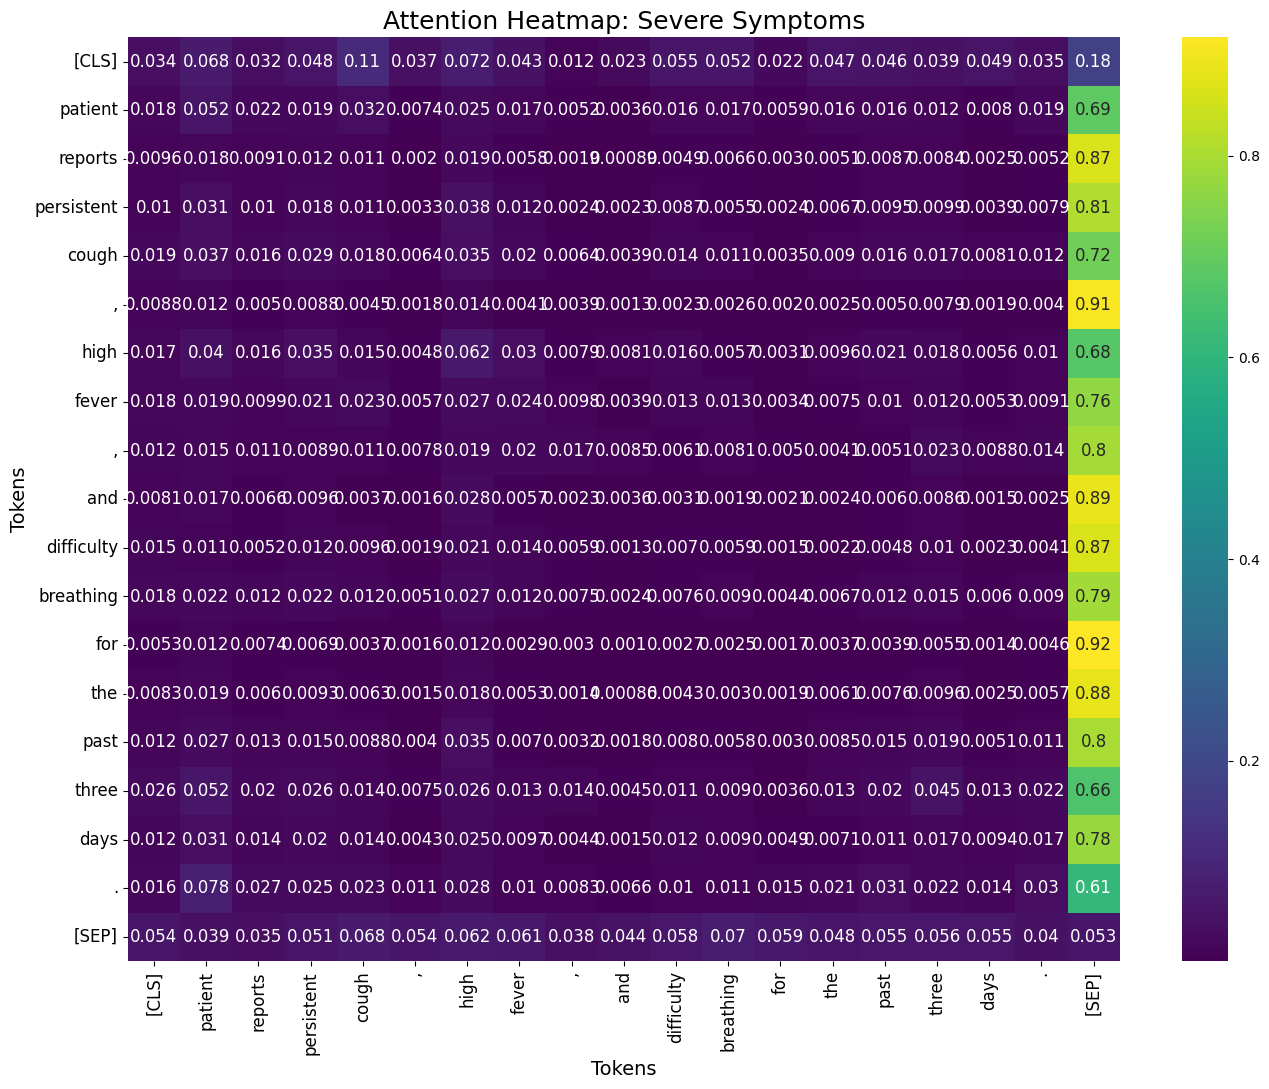

In [7]:
text1 = "Patient reports persistent cough, high fever, and difficulty breathing for the past three days."
tokens1, attention_scores1 = get_attention(text1)
plot_attention(tokens1, attention_scores1, title="Attention Heatmap: Severe Symptoms")


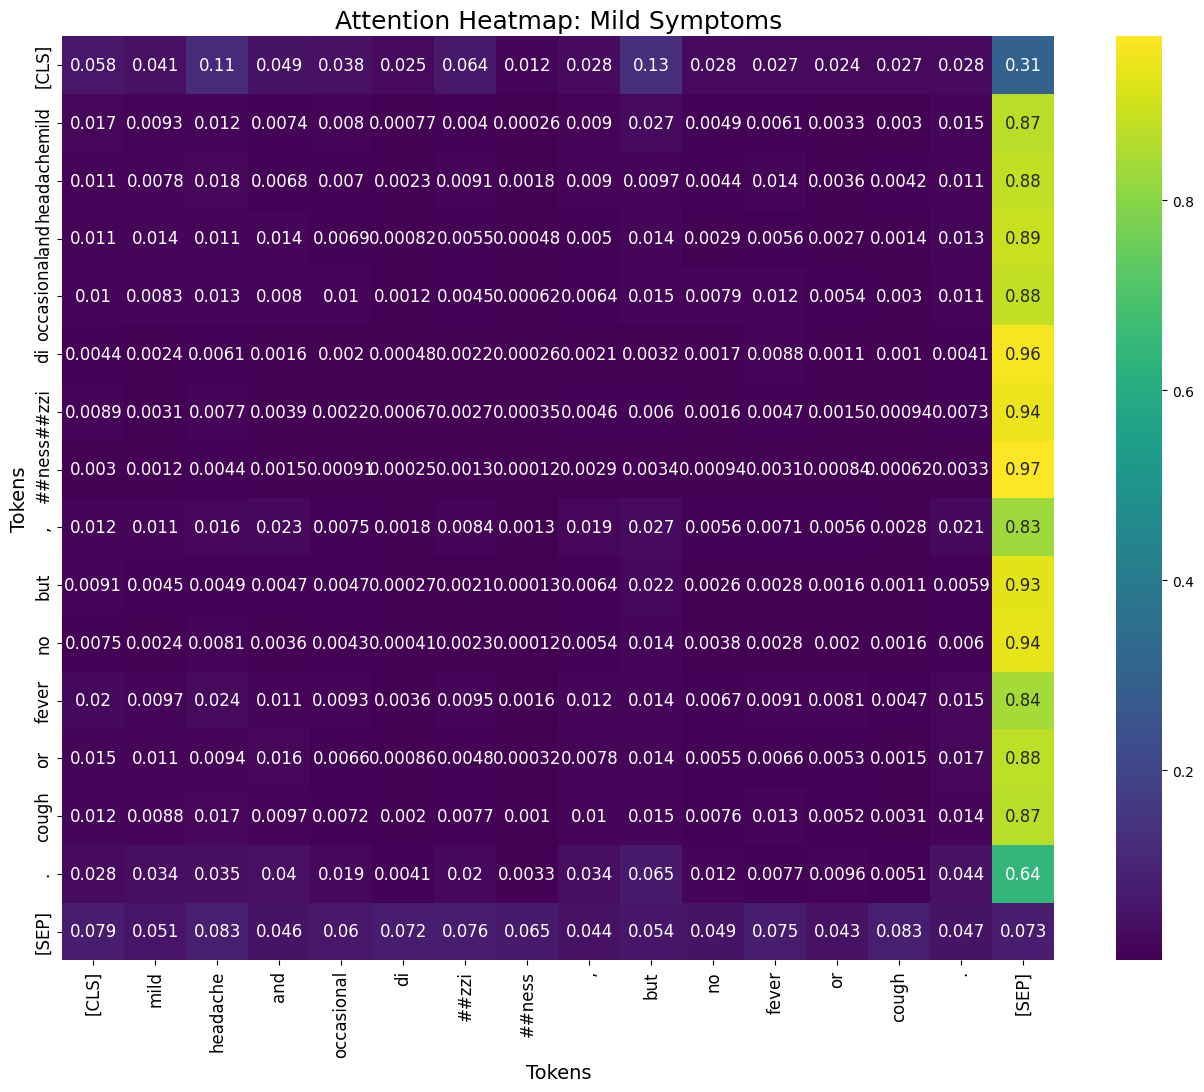

In [8]:
text2 = "Mild headache and occasional dizziness, but no fever or cough."
tokens2, attention_scores2 = get_attention(text2)
plot_attention(tokens2, attention_scores2, title="Attention Heatmap: Mild Symptoms")


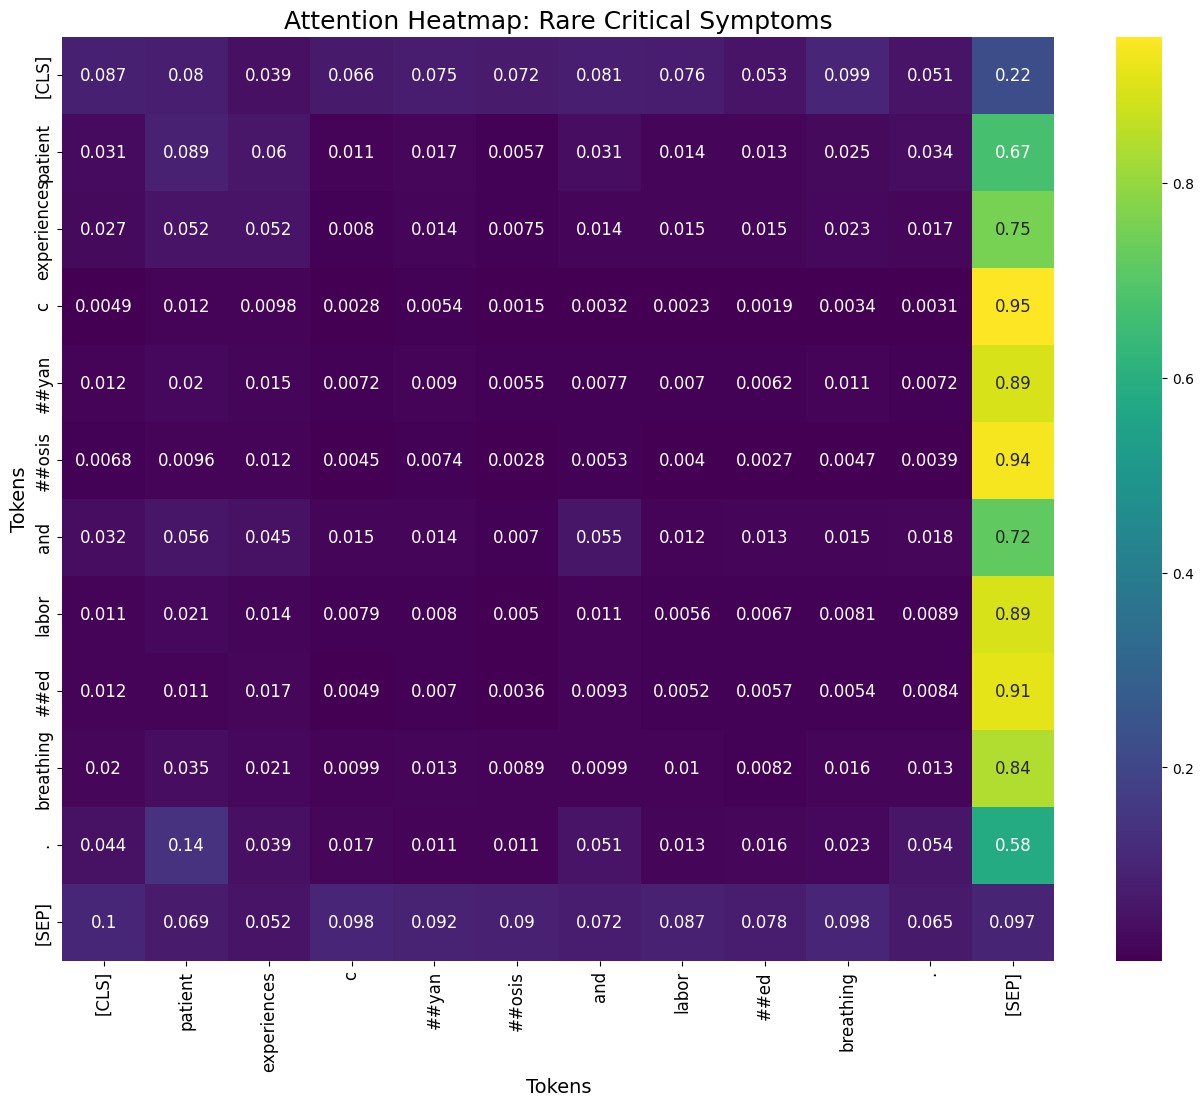

In [9]:
text3 = "Patient experiences cyanosis and labored breathing."
tokens3, attention_scores3 = get_attention(text3)
plot_attention(tokens3, attention_scores3, title="Attention Heatmap: Rare Critical Symptoms")
